In [5]:
import pandas as pd

In [6]:
data = {'Name': ["John", "Anna", "Peter", "Linda"],
'Location' : ["New York", "Paris", "Berlin", "London"],
'Age' : [24, 13, 53, 33]
}
data_pandas = pd.DataFrame(data)

In [7]:
print(data_pandas)

    Name  Location  Age
0   John  New York   24
1   Anna     Paris   13
2  Peter    Berlin   53
3  Linda    London   33


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Keys of iris_dataset: \n{}".format(iris.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [1]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 597s 4us/step


The label is: [6]


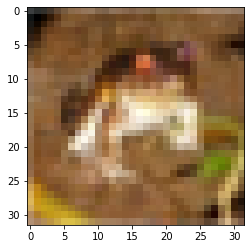

In [9]:
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])
print('The label is:', y_train[0])

In [11]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [12]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=10, validation_split=0.3 )

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 38s 1ms/step - loss: 1.7115 - accuracy: 0.3749 - val_loss: 1.4649 - val_accuracy: 0.4689
Epoch 2/10
35000/35000 [==============================] - 44s 1ms/step - loss: 1.3472 - accuracy: 0.5203 - val_loss: 1.2888 - val_accuracy: 0.5348
Epoch 3/10
35000/35000 [==============================] - 45s 1ms/step - loss: 1.1876 - accuracy: 0.5785 - val_loss: 1.1882 - val_accuracy: 0.5824
Epoch 4/10
35000/35000 [==============================] - 45s 1ms/step - loss: 1.0680 - accuracy: 0.6221 - val_loss: 1.1017 - val_accuracy: 0.6104
Epoch 5/10
35000/35000 [==============================] - 44s 1ms/step - loss: 0.9765 - accuracy: 0.6575 - val_loss: 1.0348 - val_accuracy: 0.6396
Epoch 6/10
35000/35000 [==============================] - 46s 1ms/step - loss: 0.8875 - accuracy: 0.6907 - val_loss: 0.9996 - val_accuracy: 0.6577
Epoch 7/10
35000/35000 [==============================] - 45s 1ms/st

In [25]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 4s 352us/step


0.6723999977111816

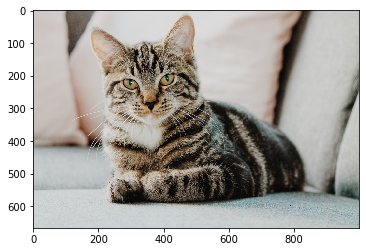

In [32]:
my_image = plt.imread("cat")
img = plt.imshow(my_image)

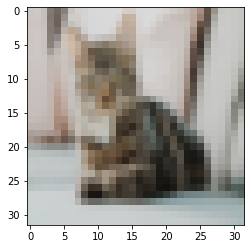

In [35]:
from skimage.transform import resize
my_image_re = resize(my_image,(32,32,3))
img = plt.imshow(my_image_re)

In [36]:
import numpy as np
probabilities = model.predict(np.array([my_image_re]))

In [37]:
probabilities

array([[7.1273390e-03, 1.5604572e-03, 4.9776860e-02, 7.7338874e-01,
        4.5501827e-03, 1.0809046e-01, 2.2704741e-02, 6.6701975e-04,
        3.1223421e-03, 2.9011870e-02]], dtype=float32)

In [38]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [39]:
index = np.argsort(probabilities[0,:])

In [41]:
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])

Most likely class: cat -- Probability: 0.77338874


In [42]:
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])

Second most likely class: dog -- Probability: 0.10809046


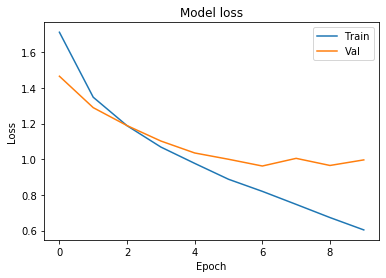

In [43]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [45]:
model.save('my_model.h5')